In [16]:
from scgenome.tantalus import get_data
from scgenome.qc import qc_cn
from IPython.display import display

hmmcopy_tickets = [
#     'SC-1935',
    'SC-1936',
#     'SC-1937',
]

sample_ids = [
#     'SA922',
    'SA921', 
#     'SA1090',
]

data = get_data(hmmcopy_tickets, sample_ids, cached=True)
cn_data = data[0]
segs_data = data[1]
metrics_data = data[2]
align_metrics_data = data[3]

print("cn_data.head()")
display(cn_data.head())

#cn = qc_cn(metrics_data, cn_data)
#print("cn.head()")
#display(cn.head())

/Users/massoudmaher/Documents/Code/scgenome/scgenome/utils.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype('category')
/Users/massoudmaher/Documents/Code/scgenome/scgenome/utils.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].cat.set_categories(col_categories[col])
2019-09-07 13:43:20,169 - INFO - ff450a1e-7a41-4509-b21b-38ac5ec708a6 - TokenRequest:Getting token with client credentials.
2019-09-07 13:43:20,372 - INFO - ff450a1e-7a41-4509-b21b-38ac5ec708a6 - OAuth2Client:Get Token Server r

cn_data.head()


,chr,start,end,reads,gc,copy,state,cell_id,sample_id,library_id
0,1,1,500000,0,-1.000000,NaN,2,SA921-A90554A-R12-C09,SA921,A90554A
1,1,500001,1000000,41,-1.000000,NaN,2,SA921-A90554A-R12-C09,SA921,A90554A
2,1,1000001,1500000,6,0.598332,1.754408,2,SA921-A90554A-R12-C09,SA921,A90554A
3,1,1500001,2000000,10,0.539498,1.873090,2,SA921-A90554A-R12-C09,SA921,A90554A
4,1,2000001,2500000,9,0.594508,2.515035,2,SA921-A90554A-R12-C09,SA921,A90554A


In [17]:
# Subset small amount of cells
n_cell = 10

keep_cells = cn_data["cell_id"].value_counts().index[0:n_cell]
sub_cn_data = cn_data[cn_data["cell_id"].isin(keep_cells)]

In [18]:
# BHC them!
from scgenome.cncluster import bayesian_cluster

linkage, clusters, cell_ids = bayesian_cluster(sub_cn_data, n_states = sub_cn_data["state"].max())

measurement.shape: (10, 6206)
entering while loop
li: 0
li: 1
li: 2
li: 3
li: 4
li: 5
li: 6
li: 7
li: 8


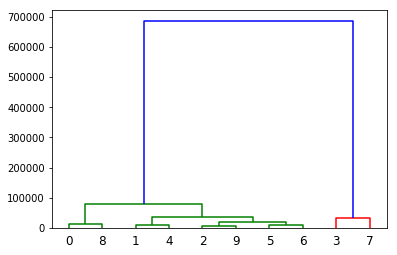

In [19]:
from scipy.cluster.hierarchy import dendrogram
from scgenome.simulation import get_plot_data

plinkage, plot_data = get_plot_data(linkage)
f = dendrogram(plot_data)

In [20]:
hmmcopy_tickets = ['SC-1937']
sample_ids = ['SA1090']

xdata = get_data(hmmcopy_tickets, sample_ids, cached=True)
xcn_data = xdata[0]
xsegs_data = xdata[1]
xmetrics_data = xdata[2]
xalign_metrics_data = xdata[3]

print("cn_data.head()")
display(xcn_data.head())

/Users/massoudmaher/Documents/Code/scgenome/scgenome/utils.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype('category')
/Users/massoudmaher/Documents/Code/scgenome/scgenome/utils.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].cat.set_categories(col_categories[col])
2019-09-07 13:44:09,710 - INFO - 39f0895c-4a8a-4ff7-a95d-71256682f989 - TokenRequest:Getting token with client credentials.
2019-09-07 13:44:09,900 - INFO - 39f0895c-4a8a-4ff7-a95d-71256682f989 - OAuth2Client:Get Token Server r

cn_data.head()


,chr,start,end,reads,gc,copy,state,cell_id,sample_id,library_id
0,1,1,500000,2,-1.000000,NaN,2,SA1090-A96213A-R34-C64,SA1090,A96213A
1,1,500001,1000000,42,-1.000000,NaN,2,SA1090-A96213A-R34-C64,SA1090,A96213A
2,1,1000001,1500000,43,0.598332,3.017390,2,SA1090-A96213A-R34-C64,SA1090,A96213A
3,1,1500001,2000000,42,0.539498,1.936414,2,SA1090-A96213A-R34-C64,SA1090,A96213A
4,1,2000001,2500000,36,0.594508,2.439622,2,SA1090-A96213A-R34-C64,SA1090,A96213A


In [21]:
# Subset small amount of cells
xkeep_cells = xcn_data["cell_id"].value_counts().index[0:n_cell]
xsub_cn_data = xcn_data[xcn_data["cell_id"].isin(xkeep_cells)]

measurement.shape: (10, 6206)
entering while loop
li: 0
li: 1
li: 2
li: 3
li: 4
li: 5
li: 6
li: 7
li: 8


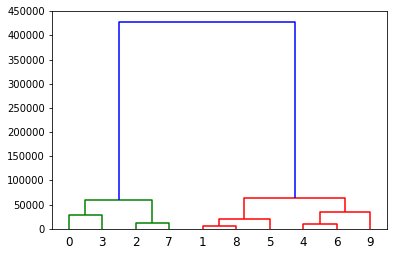

In [22]:
# BHC them!
xlinkage, xclusters, xcell_ids = bayesian_cluster(xsub_cn_data, n_states = xsub_cn_data["state"].max())

xplinkage, xplot_data = get_plot_data(xlinkage)
f = dendrogram(xplot_data)

In [30]:
# Combine two datasets and see if we can seperate 
sub_cn_data["cell_id"] = "cl1_" + sub_cn_data["cell_id"].astype("str")
xsub_cn_data["cell_id"] = "cl2_" + xsub_cn_data["cell_id"].astype("str")

bi_cn_data = sub_cn_data.append(xsub_cn_data)
bilinkage, biclusters, bicell_ids = bayesian_cluster(bi_cn_data, n_states = bi_cn_data["state"].max())

biplinkage, biplot_data = get_plot_data(bilinkage)
#f = dendrogram(biplot_data, labels = bicell_ids.str[2])

In [55]:
from scgenome import utils

In [59]:
bi_cn_mat, bi_cn_meas, bi_cn_ids = utils.cn_data_to_mat_data_ids(bi_cn_data)
#def cn_data_to_mat_data_ids(cn_data, data_id=CN_DATA_ID, cell_id=CELL_ID,
#                            index_ids=INDEX_IDS, value_ids=VALUE_IDS):

In [62]:
bi_cn_meas

array([[        nan,         nan,  1.99999996, ...,         nan,
                nan,         nan],
       [        nan,         nan,  3.2442741 , ...,         nan,
        10.03372165,         nan],
       [        nan,         nan,  3.02526709, ...,         nan,
        14.22249639,         nan],
       ...,
       [        nan,         nan,  2.13224392, ...,         nan,
         4.17483217,         nan],
       [        nan,         nan,  7.60272715, ...,         nan,
         5.70967651,         nan],
       [        nan,         nan,  1.43942136, ...,         nan,
         3.30476337,         nan]])

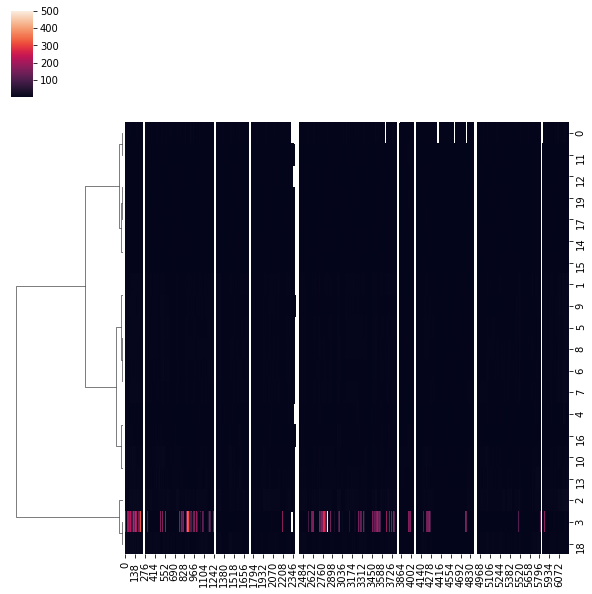

In [61]:
g = sns.clustermap(bi_cn_meas, col_cluster=False, row_linkage=biplot_data)

[[0.         1.         3.58634516 2.        ]
 [2.         3.         6.08753796 2.        ]
 [4.         5.         7.33875671 4.        ]]
[[ 1.68767663  1.56864152  3.2045739   0.81475201  1.29960368  0.84933194
   0.1653506   1.43015102  1.82127974 -0.90906034]
 [ 1.92681637  1.14069643  0.39747715  0.58975947  1.32060701  0.58188526
   1.21595281  0.56019578  0.77409471  0.38011788]
 [-1.72279328 -0.92624521 -2.52642621 -2.14464916 -0.0733425   3.02713946
  -0.72836232 -1.39158756 -1.46166297  0.53841099]
 [-2.2814342   0.8368229  -0.98932696 -2.19666656 -1.78739732 -2.21020694
  -0.24997016 -1.57799129 -0.70320819  0.28226752]]


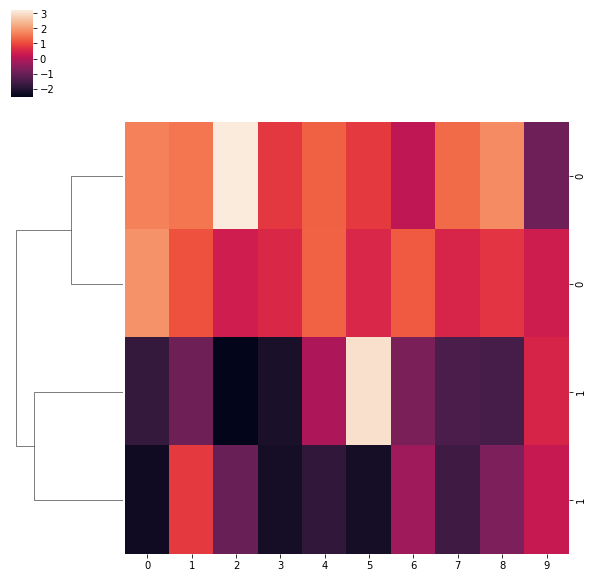

In [51]:
import seaborn as sns
import numpy as np
import scipy

cl1 = np.random.normal(loc=1,size=(2,10))
cl2 = np.random.normal(loc=-1,size=(2,10))
dat = np.concatenate([cl1,cl2], axis=0)
y_labels = ["0","0","1","1"]

linkage = scipy.cluster.hierarchy.linkage(dat)
print(linkage)

print(dat)
g = sns.clustermap(dat, col_cluster=False, row_linkage=linkage, yticklabels = y_labels)